<a href="https://colab.research.google.com/github/AISushilRaj/Zeotap/blob/main/SUSHILRAJ_GADDAM_EDA_Task_1_Exploratory_Data_Analysis_(EDA)_and_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
from google.colab import files

cuploaded = files.upload()
uploaded_filename = list(cuploaded.keys())[0]
customerpreview = pd.read_excel(io.BytesIO(cuploaded[uploaded_filename]))

Saving CustomersXL.xls to CustomersXL.xls


In [2]:
puploaded = files.upload()
puploaded_filename = list(puploaded.keys())[0]
productsspreview = pd.read_excel(io.BytesIO(puploaded[puploaded_filename]))

Saving ProductsXL.xls to ProductsXL.xls


In [3]:
tuploaded = files.upload()
tuploaded_filename = list(tuploaded.keys())[0]
Transactionspreview = pd.read_excel(io.BytesIO(tuploaded[tuploaded_filename]))

Saving TransactionsXL.xls to TransactionsXL.xls


In [5]:
transactions_merged = Transactionspreview.merge(customerpreview, on="CustomerID", how="left").merge(productsspreview, on="ProductID", how="left")

transactions_merged_preview = transactions_merged.head()
transactions_merged.info(), transactions_merged_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


(None,
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
 0        T00001      C0199      P067 2024-08-25 12:38:23         1   
 1        T00112      C0146      P067 2024-05-27 22:23:54         1   
 2        T00166      C0127      P067 2024-04-25 07:38:55         1   
 3        T00272      C0087      P067 2024-03-26 22:55:37         2   
 4        T00363      C0070      P067 2024-03-21 15:10:10         3   
 
    TotalValue  Price_x     CustomerName         Region SignupDate  \
 0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
 1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
 2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
 3      601.36   300.68  Travis Campbell  South America 2024-04-11   
 4      902.04   300.68    Timothy Perez         Europe 2022-03-15   
 
                        ProductName     Category  Price_y  
 0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
 1  ComfortLiving Bluet

<ipython-input-7-9fd3e386298c>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-9fd3e386298c>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-9fd3e386298c>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-9fd3e386298c>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


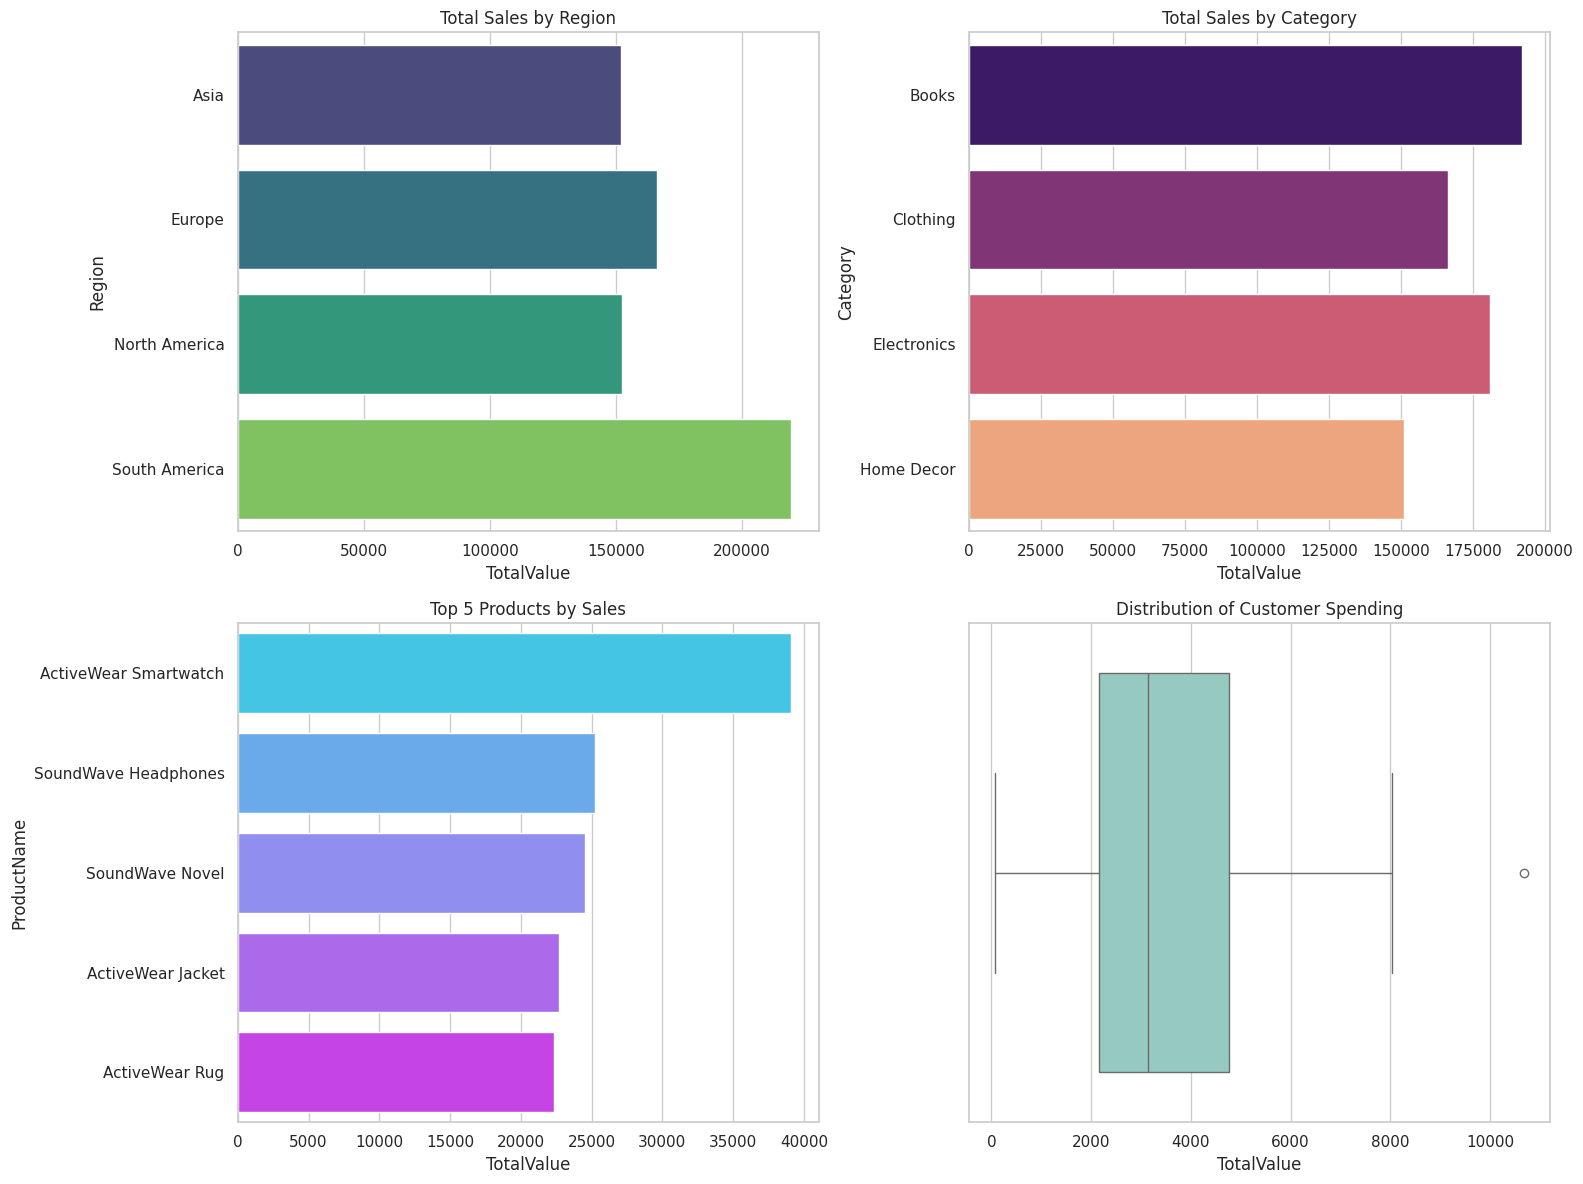

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


,ProductName,TotalValue
0,ActiveWear Smartwatch,39096.97
1,SoundWave Headphones,25211.64
2,SoundWave Novel,24507.90
3,ActiveWear Jacket,22712.56
4,ActiveWear Rug,22314.43


,TotalValue
count,199.000000
mean,3467.314372
std,1832.677958
min,82.360000
25%,2162.040000
50%,3137.660000
75%,4770.225000
max,10673.870000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Set visualization style
sns.set(style="whitegrid")

# Example DataFrames (ensure `transactions_merged` is properly prepared before running this code)
# transactions_merged = pd.merge(transactions, products, on='ProductID').merge(customers, on='CustomerID')

# EDA Summary DataFrames
region_sales = transactions_merged.groupby("Region")["TotalValue"].sum().reset_index()
category_sales = transactions_merged.groupby("Category")["TotalValue"].sum().reset_index()
top_products = (
    transactions_merged.groupby("ProductName")["TotalValue"].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)
customer_total_values = transactions_merged.groupby("CustomerID")["TotalValue"].sum().reset_index()

# Insights text
insights_paragraph = """
Sales Performance and Regional Trends:

Regional Disparities: The "Total Sales by Region" visualization reveals significant variations in sales performance across different regions. Some regions demonstrate considerably higher sales compared to others. This highlights the need for targeted regional strategies to optimize resource allocation and marketing efforts.
Category Preferences: The "Total Sales by Category" plot indicates customer preferences for certain product categories over others. Understanding these preferences enables tailored product assortment and promotions for specific regions or customer segments.
Top-Performing Products: The "Top 5 Products by Sales" visualization identifies the most popular and revenue-generating products. This information guides inventory management and marketing campaigns focused on these high-performing items.
Customer Behavior and Spending Patterns:

Customer Segmentation: The "Distribution of Customer Spending" box plot sheds light on customer spending patterns. It helps segment customers based on their purchase values, allowing for personalized marketing and loyalty programs.
Outlier Detection: The presence of outliers in the customer spending distribution indicates potential high-value customers or unusual purchasing behaviors that warrant further investigation for potential opportunities.
Actionable Recommendations:

Targeted Regional Strategies: Focus marketing and sales efforts on high-performing regions while addressing the challenges in underperforming areas.
Category Optimization: Tailor product offerings and promotions based on regional and customer category preferences.
Product Prioritization: Emphasize inventory management and marketing campaigns for top-selling products to maximize revenue.
Customer-Centric Approach: Segment customers based on spending patterns to personalize marketing and loyalty programs.
Outlier Analysis: Investigate outlier customers to identify opportunities for high-value customer engagement and retention.
"""

# Create the PDF with plots and insights text
with PdfPages("combined_insights_and_visuals.pdf") as pdf:
    # Page 1: Insights Text
    fig, ax = plt.subplots(figsize=(8.5, 11))  # Standard letter size for PDF
    ax.axis("off")  # Remove axes for text
    ax.text(0.01, 0.95, "Business Insights", fontsize=16, weight="bold", va="top")
    ax.text(0.01, 0.9, insights_paragraph, fontsize=12, va="top", wrap=True)
    pdf.savefig(fig)  # Save the first page
    plt.close(fig)

    # Page 2: Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Sales by Region
    sns.barplot(
        x="TotalValue", y="Region", data=region_sales, palette="viridis", ax=axes[0, 0]
    )
    axes[0, 0].set_title("Total Sales by Region")

    # Sales by Category
    sns.barplot(
        x="TotalValue", y="Category", data=category_sales, palette="magma", ax=axes[0, 1]
    )
    axes[0, 1].set_title("Total Sales by Category")

    # Top 5 Products
    sns.barplot(
        x="TotalValue", y="ProductName", data=top_products, palette="cool", ax=axes[1, 0]
    )
    axes[1, 0].set_title("Top 5 Products by Sales")

    # Customer Purchase Summary
    sns.boxplot(
        x='TotalValue', data=customer_total_values, palette="Set3", ax=axes[1, 1]
    )
    axes[1, 1].set_title("Distribution of Customer Spending")

    # Add the visualizations page to the PDF
    plt.tight_layout()
    plt.show()
    pdf.savefig(fig)
    plt.close(fig)



display(region_sales, category_sales, top_products, customer_purchase)
# Download the PDF in Google Colab
from google.colab import files
files.download("combined_insights_and_visuals.pdf")
